In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import sklearn.cluster as sc

In [2]:
data = pd.read_csv("multiple3.txt",header = None, names=["x1", "x2"])
data

,x1,x2
0,1.96,-0.09
1,2.84,3.16
2,4.74,1.84
3,6.36,4.89
4,1.77,1.55
...,...,...
195,6.64,6.66
196,2.15,0.75
197,3.26,6.08
198,5.72,1.98


<AxesSubplot:xlabel='x3', ylabel='x4'>

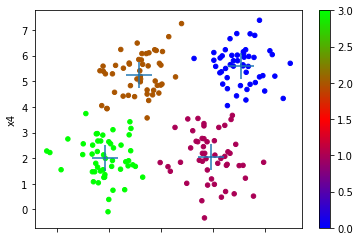

In [3]:
# Kmeans
model = sc.KMeans(n_clusters = 4)
model.fit(data)
labels = model.labels_
ax = data.plot.scatter(x = 'x1', y = 'x2', c = labels, cmap = 'brg')
#这部分不能分到另外一个模块去写，相当于用了ax是在上面的图的基础上去画的
centers = model.cluster_centers_
centers = pd.DataFrame(centers, columns=['x3','x4'])
centers.plot.scatter(x='x3', y='x4',s = 700, marker='+', ax = ax)

In [4]:
# 轮廓系数校验
v = sm.silhouette_score(data, labels, sample_size = len(data), metric='euclidean')
print(v)

0.5773232071896659


<AxesSubplot:xlabel='x3', ylabel='x4'>

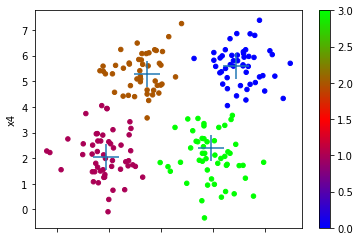

In [5]:
#均值漂移
bw = sc.estimate_bandwidth(data, n_samples=len(data), quantile=0.1)
model = sc.MeanShift(bandwidth=bw, bin_seeding = True)
model.fit(data)
labels = model.labels_
ax = data.plot.scatter(x = 'x1', y='x2',c= labels, cmap='brg')

centers = model.cluster_centers_
centers = pd.DataFrame(centers, columns=['x3','x4'])
centers.plot.scatter(x='x3', y='x4', s=700, marker = '+', ax =ax)

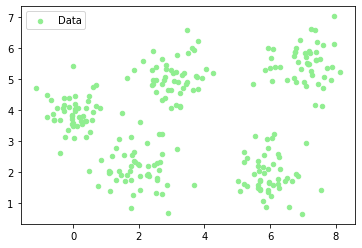

In [29]:
#DBSCAN
data = pd.read_csv('perf.txt', header = None, names=['x1','x2'])
plt.scatter(data['x1'], data['x2'], label = 'Data', s= 20, color = 'lightgreen')
plt.legend()
plt.show()

In [12]:
#使用轮廓系数选出最佳半径
r = np.arange(0.5, 1.2, 0.1)
for i in r:
    model = sc.DBSCAN(eps = i, min_samples=5)
    model.fit(data)
    labels = model.labels_
    v = sm.silhouette_score(data, labels, sample_size = len(data), metric='euclidean')
    print(i, ':', v)

0.5 : 0.5134143263329636
0.6 : 0.6165321688342581
0.7 : 0.632160045068924
0.7999999999999999 : 0.6366395861050828
0.8999999999999999 : 0.514167895613453
0.9999999999999999 : 0.5629298661962946
1.0999999999999999 : 0.5629298661962946


In [20]:
#由上得出最佳半径为0.8
model = sc.DBSCAN(eps = 0.8, min_samples=5)
model.fit(data)
label = model.labels_
label

array([ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,
        2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,
        4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4, -1,
        1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  0,  2,  3,  4,  0,  1,  2,
        3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,
        0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,
        2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,
        4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,
        1,  2,  3,  4,  0,  1,  2,  3,  0,  0,  1,  2,  3,  4,  0,  1,  2,
        3,  4,  0,  1,  2,  3,  4,  0,  1, -1,  3, -1,  0,  1, -1,  3,  4,
        0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,
        2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,
        4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,
        1,  2,  3,  4,  0

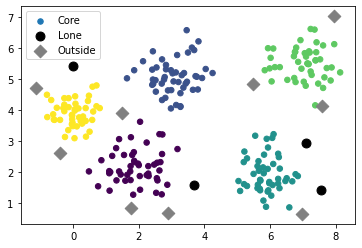

In [26]:
#数据可视化

#绘制核心样本
core_samples = data.loc[model.core_sample_indices_]
#这的label没有用loc，因为label的数据类型是ndaarry
plt.scatter(core_samples['x1'], core_samples['x2'], s=30, label = 'Core', c = label[model.core_sample_indices_])

#绘制孤立样本
#-1表示这个样本是False，没有被选中入其他的圈子
lone_samples = data[label == -1]
plt.scatter(lone_samples['x1'], lone_samples['x2'], s=80, color = 'black', label = 'Lone')


#绘制外周样本
wz_samples = data.drop(core_samples.index)
wz_samples = wz_samples.drop(lone_samples.index)
plt.scatter(wz_samples['x1'], wz_samples['x2'], s= 80, color = 'gray', marker = 'D', label = 'Outside')

plt.legend()
plt.show()